![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Project - Movies Genres Classification

This project will use a set of movies genres data . Each observation has the titile of the movie, year of the movie,  title plot and the different genres of the movie (a movie might be classifief to multiples genres). For instance:

Title: 'How to Be a Serial Killer'</br>
Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'</br>
Genres: 'Comedy', 'Crime', 'Horror'

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)


The idea is to use this data in order to predict the likely of a movie belongs to a genre given its plot.

Thank to Professor Fabio González, Ph.D. and his student John Arevalo by providing  this dataset (Uniandes). See https://arxiv.org/abs/1702.01992


## CODING


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries to use
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#Reading datasets
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [4]:
dataTraining.head()
dataTraining.describe().T
#Completeness level
print(dataTraining.isnull().sum())


year      0
title     0
plot      0
genres    0
rating    0
dtype: int64


year      0
title     0
plot      0
genres    0
rating    0
dtype: int64


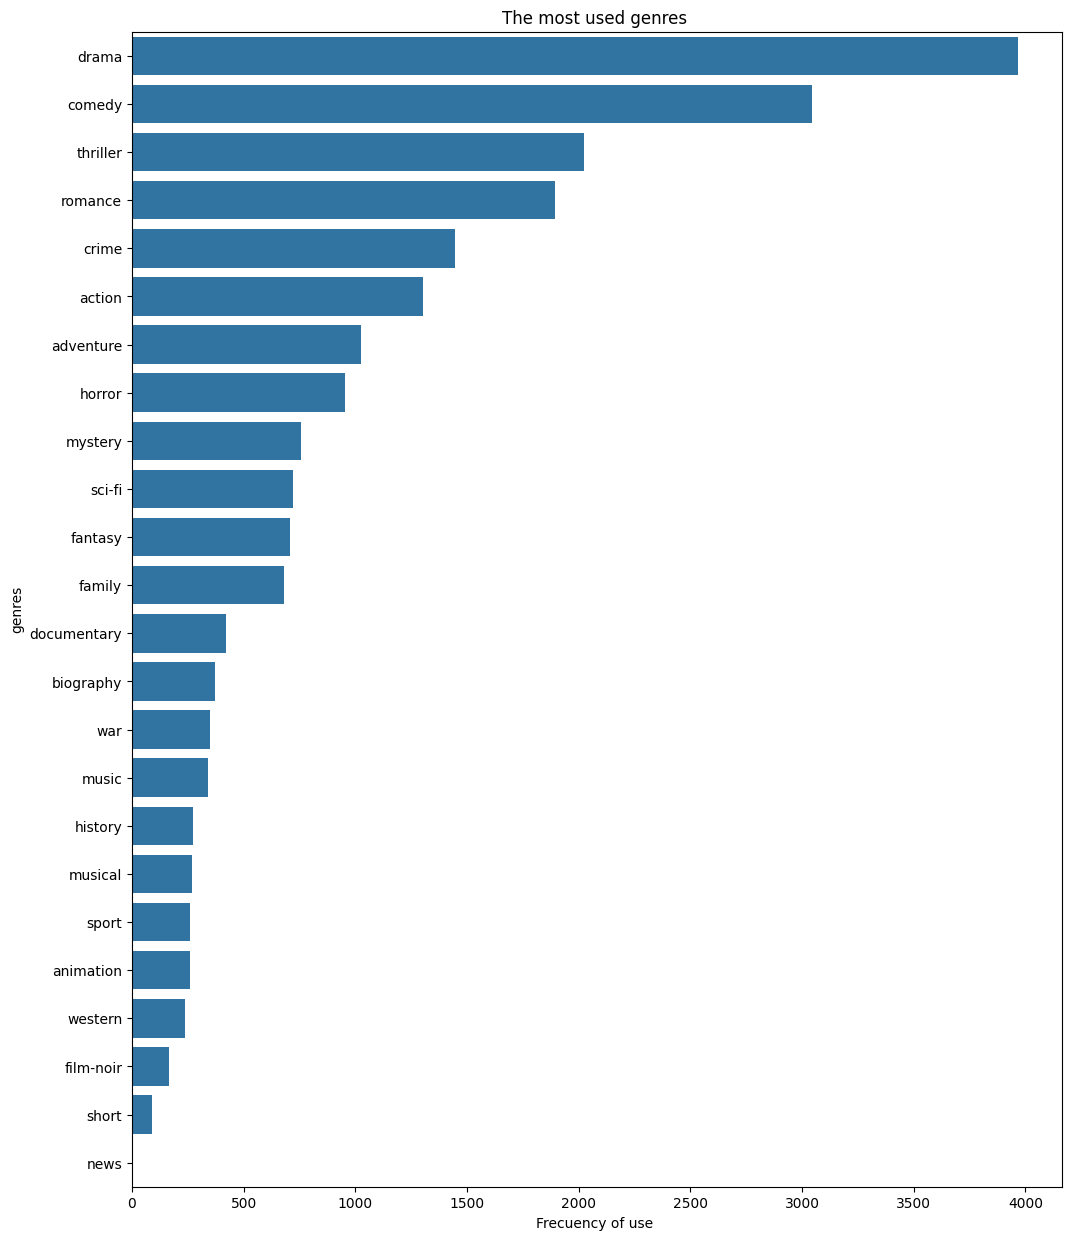

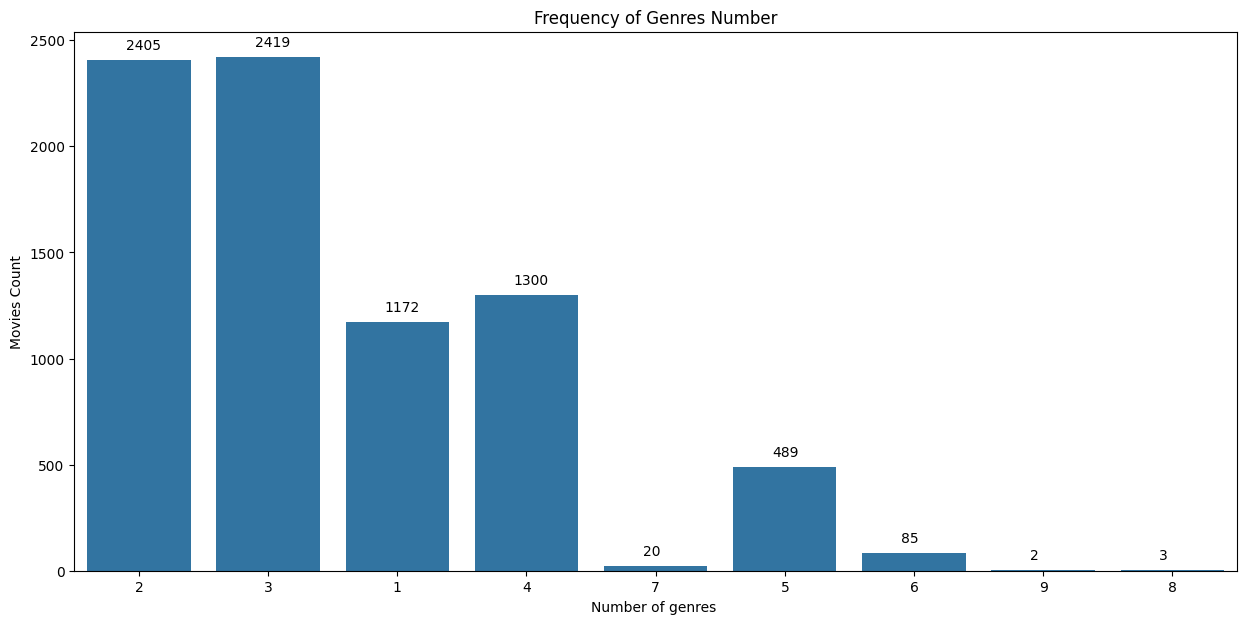

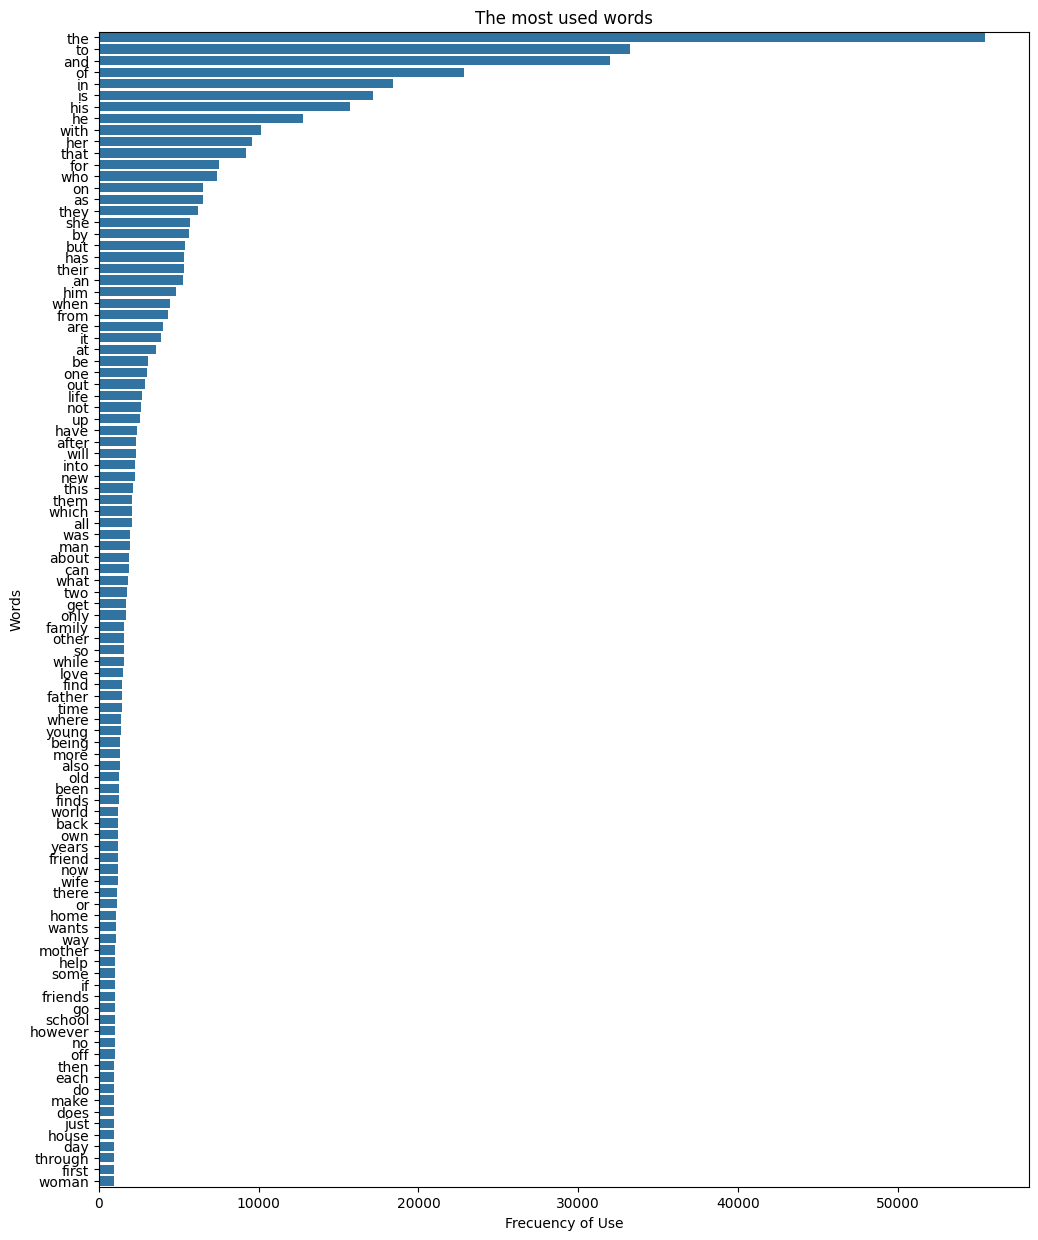

In [5]:
# Data Visualization
dataTraining.head()
dataTraining.describe().T
#Completeness level
print(dataTraining.isnull().sum())

# Validate if the column genre has spaces or is empty. If so, this row does not come handy for our prediction
dataTraining=dataTraining[~(dataTraining['genres'].str.len()==0)]
dataTraining=dataTraining[~dataTraining['genres'].str.isspace()]
# Validate if the column plot has spaces or is empty. If so, this row does not come handy for our prediction
dataTraining=dataTraining[~(dataTraining['plot'].str.len()==0)]
dataTraining=dataTraining[~dataTraining['plot'].str.isspace()]
# Validate if the column title has spaces or is empty. If so, this row does not come handy for our prediction
dataTraining=dataTraining[~(dataTraining['title'].str.len()==0)]
dataTraining=dataTraining[~dataTraining['title'].str.isspace()]


# Visualize the frecuency of genres

dataTraining['genres_transf'] = dataTraining['genres'].map(lambda x: eval(x))
dataTraining['genres_transf'] = dataTraining['genres_transf'].str.join(',')
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))
genres_dtm = vectorizer.fit_transform(dataTraining['genres_transf'])
genres_df = pd.DataFrame(genres_dtm.toarray(), columns=vectorizer.get_feature_names_out())
freq_genres= genres_df.sum().sort_values( ascending=False)
plt.figure(figsize=(12,15)) 
ax=sns.barplot(x=freq_genres.values, y=freq_genres.index)
ax.set(title='The most used genres ', xlabel='Frecuency of use ', ylabel='genres')
plt.show()

#Visualize  the count of movies by genre
genres_df['CountOfGenres']= genres_df.sum(axis=1).sort_values( ascending=False)
genres_df['CountOfGenres']= genres_df['CountOfGenres'].astype(str)
plt.figure(figsize=(15,7)) 
ax=sns.countplot(data=genres_df, x='CountOfGenres')
ax.set(title='Frequency of Genres Number',xlabel='Number of genres ', ylabel='Movies Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

# Frecuency of use of words that conform the corpus PLOT
vectorizer = CountVectorizer(analyzer='word')
plot_dtm = vectorizer.fit_transform(dataTraining['plot'])
plots_df = pd.DataFrame(plot_dtm.toarray(), columns=vectorizer.get_feature_names_out())
freq_plots= plots_df.sum().sort_values( ascending=False)[0:100]
plt.figure(figsize=(12,15)) 
ax=sns.barplot(x=freq_plots.values, y=freq_plots.index)
ax.set(title='The most used words', xlabel='Frecuency of Use', ylabel='Words')
plt.show()




In [6]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...
